# 스크래핑 모듈 테스트
스크래핑을 통해 질문에 대한 정답이 어느정도 있는지 확인하여 모듈의 성능을 테스트합니다.

In [1]:
import sys
## Root 파일(.py)을 Import 하기
sys.path.append("../")

In [2]:
from scrap import get_wiki_data, get_blog_data
import pandas as pd

In [15]:
#한글 폰트 사용
from matplotlib import font_manager,rc
import matplotlib
import matplotlib.pyplot as plt
#폰트 경로
font_path = "C:/Windows/Fonts/H2GTRM.TTF"
#폰트 이름 얻어오기
font_name = font_manager.FontProperties(fname=font_path).get_name()
#font 설정
matplotlib.rc('font',family=font_name)

## 1. 테스트 QA 데이터
QA_testset은 8가지 카테고리를 갖고 있는 총 100개 데이터셋입니다. 질문과 짧은 답변으로만 이루어져 있으므로 스크래핑된 HTML에 답변이 있는지에 대한 간단한 모듈테스트에 적합합니다.

In [3]:
data_path = 'QA_testset.csv'
test_df = pd.read_csv(data_path)

In [4]:
test_df.head()

,카테고리,question,answer
0,역사,고구려를 건국한 왕은?,주몽
1,역사,과거제를 처음 도입한 시대는?,고려시대
2,역사,훈민정음을 창제한 왕은?,세종대왕
3,역사,동학농민운동을 이끈 사람은?,전봉준
4,역사,문예 부흥이라는 중세 유럽에 일어난 운동은?,르네상스


In [5]:
test_df['카테고리'].unique()

array(['역사', '경제경영', '사회', '정치', '과학', '문화스포츠', '인문학', '기타'], dtype=object)

## 2. WIKI 스크래핑 모듈 테스트
[위키피디아](https://ko.wikipedia.org/w/index.php?search=) 에서 크롤링한 데이터가 질문에 맞는 대답을 어느정도 갖고 있는지 테스트 합니다.

In [35]:
def check_wiki_answer(question, answer, num):
    for html in get_wiki_data(question, num):
        if answer in html:
            return 1
    return 0

In [36]:
%%time
test_df['wiki_has_answer_1'] = test_df.apply(lambda row: check_wiki_answer(row['question'], row['answer'], 1), axis=1)
print("WIKI URL 1개의 coverage : {}".format(test_df['wiki_has_answer_1'].sum()/len(test_df)))

WIKI URL 1개의 coverage : 0.47
Wall time: 2min 33s


In [37]:
%%time
test_df['wiki_has_answer_5'] = test_df.apply(lambda row: check_wiki_answer(row['question'], row['answer'], 5), axis=1)
print("WIKI URL 5개의 coverage : {}".format(test_df['wiki_has_answer_5'].sum()/len(test_df)))

WIKI URL 5개의 coverage : 0.57
Wall time: 4min 37s


In [23]:
total_count = test_df.groupby(['카테고리'])['카테고리'].count()
wiki_has_answer_1_count = test_df.groupby(['카테고리'])['wiki_has_answer_1'].sum()
wiki_has_answer_5_count = test_df.groupby(['카테고리'])['wiki_has_answer_5'].sum()
wiki1 = (wiki_has_answer_1_count/total_count)
wiki5 = (wiki_has_answer_5_count/total_count)

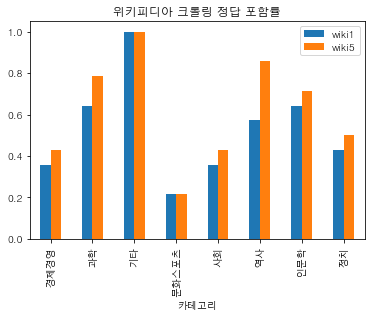

In [44]:
pd.concat([wiki1, wiki5], keys=['wiki1', 'wiki5'], axis=1).plot.bar(title="위키피디아 크롤링 정답 포함률")

## 3. 블로그 스크래핑 모듈 테스트
[네이버블로그](https://search.naver.com/search.naver) 에서 크롤링한 데이터가 질문에 맞는 대답을 어느정도 갖고 있는지 테스트 합니다.

In [4]:
def check_blog_answer(question, answer, num):
    for html in get_blog_data(question, num):
        if answer in html:
            return 1
    return 0

In [5]:
%%time
test_df['blog_has_answer_1'] = test_df.apply(lambda row: check_blog_answer(row['question'], row['answer'], 1), axis=1)
print("BLOG URL 1개의 coverage : {}".format(test_df['blog_has_answer_1'].sum()/len(test_df)))

BLOG URL 1개의 coverage : 0.36
Wall time: 38.4 s


In [6]:
%%time
test_df['blog_has_answer_5'] = test_df.apply(lambda row: check_blog_answer(row['question'], row['answer'], 5), axis=1)
print("BLOG URL 5개의 coverage : {}".format(test_df['blog_has_answer_5'].sum()/len(test_df)))

BLOG URL 5개의 coverage : 0.73
Wall time: 1min 30s


In [40]:
total_count = test_df.groupby(['카테고리'])['카테고리'].count()
blog_has_answer_1_count = test_df.groupby(['카테고리'])['blog_has_answer_1'].sum()
blog_has_answer_5_count = test_df.groupby(['카테고리'])['blog_has_answer_5'].sum()
blog1 = (blog_has_answer_1_count/total_count)
blog5 = (blog_has_answer_5_count/total_count)

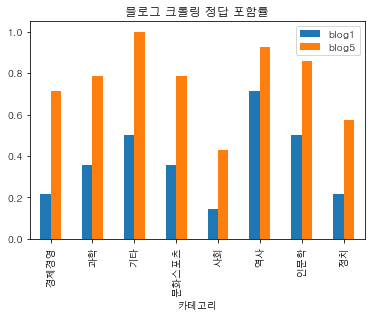

In [45]:
pd.concat([blog1, blog5], keys=['blog1', 'blog5'], axis=1).plot.bar(title="블로그 크롤링 정답 포함률")

## 4. 블로그, WIKI 스크래핑 모듈 테스트
위키피디아와 네이버블로그 에서 크롤링한 데이터가 질문에 맞는 대답을 어느정도 갖고 있는지 테스트 합니다.

In [7]:
test_df['wiki_blog_has_answer_1'] = test_df.apply(lambda row: int(row['wiki_has_answer_1']+row['blog_has_answer_1']>0), axis=1)
print("WIKI_BLOG URL 1개의 coverage : {}".format(test_df['wiki_blog_has_answer_1'].sum()/len(test_df)))

WIKI_BLOG URL 1개의 coverage : 0.62


In [8]:
test_df['wiki_blog_has_answer_5'] = test_df.apply(lambda row: int(row['wiki_has_answer_5']+row['blog_has_answer_5']>0), axis=1)
print("WIKI_BLOG URL 5개의 coverage : {}".format(test_df['wiki_blog_has_answer_5'].sum()/len(test_df)))

WIKI_BLOG URL 5개의 coverage : 0.83


In [42]:
total_count = test_df.groupby(['카테고리'])['카테고리'].count()
wiki_blog_has_answer_1_count = test_df.groupby(['카테고리'])['wiki_blog_has_answer_1'].sum()
wiki_blog_has_answer_5_count = test_df.groupby(['카테고리'])['wiki_blog_has_answer_5'].sum()
wiki_blog1 = (wiki_blog_has_answer_1_count/total_count)
wiki_blog5 = (wiki_blog_has_answer_5_count/total_count)

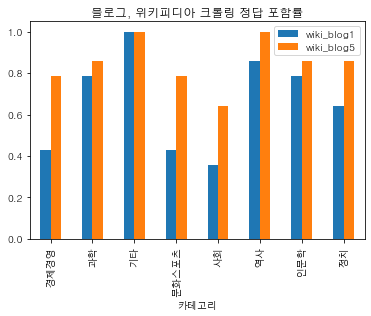

In [46]:
pd.concat([wiki_blog1, wiki_blog5], keys=['wiki_blog1', 'wiki_blog5'], axis=1).plot.bar(title="블로그, 위키피디아 크롤링 정답 포함률")

In [47]:
test_df.head()

,Unnamed: 0,카테고리,question,answer,wiki_has_answer_1,wiki_has_answer_5,blog_has_answer_1,blog_has_answer_5,wiki_blog_has_answer_1,wiki_blog_has_answer_5
0,0,역사,고구려를 건국한 왕은?,주몽,1,1,1,1,1,1
1,1,역사,과거제를 처음 도입한 시대는?,고려시대,0,1,0,0,0,1
2,2,역사,훈민정음을 창제한 왕은?,세종대왕,0,1,1,1,1,1
3,3,역사,동학농민운동을 이끈 사람은?,전봉준,1,1,1,1,1,1
4,4,역사,문예 부흥이라는 중세 유럽에 일어난 운동은?,르네상스,1,1,1,1,1,1


In [48]:
test_df.to_csv("QA_crawler_test_result.csv")